# Ford GoBike Trip Data Analysis
## by Michael Mathias

## Introduction
The Ford GoBike Trip dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
# Loading data for analysis
df_biketrip = pd.read_csv('201902-fordgobike-tripdata.csv')
df_biketrip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Accessing Dataset
Accessing data both visualy, in google sheets, and programatically to find quality and tidiness issues.

In [3]:
df_biketrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

>There are **16 columns** and **183412 rows** in the dataset. **6** of the columns have missing data `["start_station_id", "start_station_name", "end_station_id", "end_station_name", "member_birth_year", "member_gender"]`.
>
>Below, I will dive a little deeper to see why the missing values in these columns.

In [4]:
# Querying dataset for rows where "start_station_id" is not equal to itself, since Nan != Nan
df_biketrip.query('start_station_id != start_station_id').head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


In [5]:
df_biketrip.query('start_station_id != start_station_id').shape

(197, 16)

In [6]:
df_biketrip.query('start_station_id != start_station_id or end_station_id != end_station_id').shape

(197, 16)

>From the above we know that there are about **197** missing `start_station` information and for every missing `start_station` information, there is a missing `end_station` infomation.
>
>However, we can see that we have **latitude** and **longitude** information for each of this missing stations and hence we can compute the **distance traveled**. This distance will be an important feature of our analysis so we can leave those missing values.

In [7]:
# Querying for Nan in "member_birth_year", same principle used here since Nan != Nan
df_biketrip.query('member_birth_year != member_birth_year').head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No


In [8]:
df_biketrip.query('member_birth_year != member_birth_year').shape

(8265, 16)

In [9]:
df_biketrip.query('member_birth_year != member_birth_year and member_gender != member_gender').shape

(8265, 16)

In [10]:
df_biketrip.query('member_birth_year != member_birth_year and user_type == "Subscriber"').shape

(5028, 16)

In [11]:
df_biketrip.query('member_birth_year != member_birth_year and bike_share_for_all_trip == "Yes"').shape

(0, 16)

> It can be noticed that for each user without a birth_year, user also has no gender. These users can be `Subscriber`s or not, but none of this users with missing `birth_years` and `genders` uses the `bike_share_for_all_trip` feature.

In [12]:
# Having a look at some descriptive statistics
df_biketrip.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
df_biketrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Data Issues
##### Quality Issues
* Erroneous data types `["start_time", "end_time", "start_station_id", "end_station_id", "bike_id", "member_birth_year", "user_type", "member_gender", "bike_share_for_all_trip"]`.
* Inconsistent column names `["user_type", "member_birth_year", "member_gender"]`.
* Multiple columns used to encode same variable `"duration_sec"` and `["start_time", "end_time"]`.
* Difficulty interpreting duration.
* Engineer new features, `age` and `distance`.

##### Tidy Issues
* Transfer station information to station table.

### Cleaning Data
Cleaning all issues above

In [14]:
# First make copy of the original dataset
df_biketrip_copy = df_biketrip.copy()

#### Issue #1: Erroneous data types
##### Define:
* Convert `start_time` and `end_time` to `datetime` using `pandas.to_datetime()` function.

* Next, convert all `ids` columns to string using `pandas.Series().astype()` function. For `"start_station_id"` and `"end_station_id"`, replace **'nan'** with `np.nan` after converting to string.

* Convert `member_birth_year` to `datetime` using `pandas.to_datetime()` function. First change to string and format to `"year-month-day"` with **month and day = 01** since you can't have 0 month or day.

* Finally, convert `["user_type", "member_gender", "bike_share_for_all_trip"]` to `category` using `pandas.Series().astype()`.

##### Code

In [15]:
# Convert start_time to datetime
df_biketrip_copy['start_time'] = pd.to_datetime(df_biketrip_copy['start_time'])

# Convert end_time to datetime
df_biketrip_copy['end_time'] = pd.to_datetime(df_biketrip_copy['end_time'])

In [16]:
# Convert bike_id to string
df_biketrip_copy['bike_id'] = df_biketrip_copy['bike_id'].astype(str)

# Convert start_station_id to string
df_biketrip_copy['start_station_id'] = df_biketrip_copy['start_station_id'].astype(str)

# Convert end_station_id to string
df_biketrip_copy['end_station_id'] = df_biketrip_copy['end_station_id'].astype(str)

# Strip the floating part of the ids
df_biketrip_copy['start_station_id'] = df_biketrip_copy['start_station_id'].str.strip('.0')
df_biketrip_copy['end_station_id'] = df_biketrip_copy['end_station_id'].str.strip('.0')

# Replace "nan" with np.nan for both station ids
df_biketrip_copy['start_station_id'].replace('nan', np.nan, inplace=True)
df_biketrip_copy['end_station_id'].replace('nan', np.nan, inplace=True)

In [17]:
# Create function to format year
format_year = lambda year: '{:.0f}-01-01 00:00:00'.format(year) if year == year else np.nan

# Apply format_year to member_birth_year
df_biketrip_copy['member_birth_year'] = df_biketrip_copy['member_birth_year'].apply(format_year)

# Now convert member_birth_year to datetime
df_biketrip_copy['member_birth_year'] = pd.to_datetime(df_biketrip_copy['member_birth_year'])

In [18]:
# Convert "user_type" to category
df_biketrip_copy['user_type'] = df_biketrip_copy['user_type'].astype('category')

# Convert "member_gender" to category
df_biketrip_copy['member_gender'] = df_biketrip_copy['member_gender'].astype('category')

# Convert "bike_share_for_all_trip" to category
df_biketrip_copy['bike_share_for_all_trip'] = df_biketrip_copy['bike_share_for_all_trip'].astype('category')

##### Test

In [19]:
columns_modified = ["start_time", "end_time", "start_station_id", "end_station_id", "bike_id", "member_birth_year", "user_type", "member_gender", "bike_share_for_all_trip"]
df_biketrip_copy[columns_modified].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183412 non-null  datetime64[ns]
 1   end_time                 183412 non-null  datetime64[ns]
 2   start_station_id         183215 non-null  object        
 3   end_station_id           183215 non-null  object        
 4   bike_id                  183412 non-null  object        
 5   member_birth_year        175147 non-null  datetime64[ns]
 6   user_type                183412 non-null  category      
 7   member_gender            175147 non-null  category      
 8   bike_share_for_all_trip  183412 non-null  category      
dtypes: category(3), datetime64[ns](3), object(3)
memory usage: 8.9+ MB


#### Issue #2: Inconsistent column names
##### Define:
I want to be consistent with the word **user** so I will be changing **member** to **user** in the column names.
* Use `pandas.DataFrame.rename()` function to raname `member_birth_year` and `member_gender` to `user_birth_year` and `user_gender` respectively.

##### Code

In [20]:
# Rename "member_birth_year" and "member_gender" to "user_birth_year" and "user_gender" respectively
df_biketrip_copy.rename(columns={'member_birth_year':'user_birth_year', 'member_gender':'user_gender'}, inplace=True)

##### Test

In [21]:
df_biketrip_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'user_birth_year', 'user_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### Issue #3: Multiple columns used to encode same variable *duration*
##### Define:
* Create new column, `timestamp`, with `start_time` in it.
* Drop `start_time` and `end_time`.

##### Code

In [22]:
# Rename "start_time" to "timestamp"
df_biketrip_copy.rename(columns={'start_time':'timestamp'}, inplace=True)

# Drop "end_time"
df_biketrip_copy.drop(columns=['end_time'], inplace=True)

##### Test

In [23]:
df_biketrip_copy.columns

Index(['duration_sec', 'timestamp', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'user_birth_year', 'user_gender',
       'bike_share_for_all_trip'],
      dtype='object')

#### Issue #4: Difficulty interpreting duration
##### Define:
* Divide duration_secs by 60 to get duration in minutes
* Change name from duration_sec to duration

##### Code

In [24]:
# Divide duration_secs by 60
df_biketrip_copy['duration_sec'] = (df_biketrip_copy['duration_sec']/60).astype(int)

# Change name from duration_sec to duration
df_biketrip_copy.rename(columns={'duration_sec':'duration'}, inplace=True)

##### Test

In [25]:
df_biketrip_copy.head()

,duration,timestamp,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip
0,869,2019-02-28 17:32:10.145,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No
1,708,2019-02-28 18:53:21.789,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaT,NaN,No
2,1030,2019-02-28 12:13:13.218,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No
3,608,2019-02-28 17:54:26.010,375,Grove St at Masonic Ave,37.774836,-122.446546,7,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No
4,26,2019-02-28 23:54:18.549,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes


#### Issue #5: Engineer new features, `age` and `distance`.
##### Define:
* Create function to calculate the distance between two points via thier latitude and longitude
* Create new column, `user_age` which is the difference between `user_birth_year`.year and `timestamp`.year. Replace `NaN`s with `"-1"` and convert column to `int` coz we want age to be whole not a fraction.
* Create new column, `distance` which is a concatenation of the latitudes and longitudes with a comma, this would be the input of the function that would return the distance in the unit specified. (I am using this method instead of a `for loop` because `numpy` performs operations faster).

##### Code

In [26]:
# Create function to calculate distance.

def get_distance(location_params, unit):
    """ Returns the distance between 2 points based on latitude and longitudes.
    This function uses the "Haversine formula". Reference: https://en.wikipedia.org/wiki/Haversine_formula
        
    Parameters:
    location_params (string): String concatenation of longitudes and latitudes "latitude1,longitude1,latitude2,longitude2"
    unit (string): Unit of distance {miles, km}

    Returns:
    float: Distance between 2 point.
    """ 
    
    # Extract longitudes and latitudes from location_params
    location_params = location_params.split(',')
    lat1 = float(location_params[0])
    lon1 = float(location_params[1])
    lat2 = float(location_params[2])
    lon2 = float(location_params[3])
    
    # First convert from degrees to radians.
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
 
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of earth in
    r = 3958.8 if unit == 'miles' else 6371
      
    # Return distance in kilometer
    return(c * r)

In [27]:
# Create new column, `user_age` which is the difference between `user_birth_year`.year and `timestamp`.year. 
df_biketrip_copy['user_age'] = df_biketrip_copy['timestamp'].dt.year - df_biketrip_copy['user_birth_year'].dt.year

# Replace `NaN`s with `"-1"`, this will represent rows with missing age. We do this because python integer has no way
# of representing nan
df_biketrip_copy['user_age'].replace(np.nan, -1, inplace=True)

# Convert column to `int` coz we want age to be whole not a fraction.
df_biketrip_copy['user_age'] = df_biketrip_copy['user_age'].astype(int)

In [28]:
# First create a comma colum
df_biketrip_copy['comma'] = ','

# Now concatenate location_params following the format "latitude1,longitude1,latitude2,longitude2"
df_biketrip_copy['distance'] = df_biketrip_copy['start_station_latitude'].astype(str) + df_biketrip_copy['comma'] + df_biketrip_copy['start_station_longitude'].astype(str) + df_biketrip_copy['comma'] + df_biketrip_copy['end_station_latitude'].astype(str) + df_biketrip_copy['comma'] + df_biketrip_copy['end_station_longitude'].astype(str)

# Next apply the "get_distance()" function on "distance_travelled" column and convert to float
df_biketrip_copy['distance'] = df_biketrip_copy['distance'].apply(get_distance, args=('km',)).astype(float)

# Now Drop comma column
df_biketrip_copy.drop(columns=['comma'], inplace=True)

##### Test

In [29]:
df_biketrip_copy[['user_age', 'distance']].head()

,user_age,distance
0,35,0.544709
1,-1,1.742999
2,47,2.704545
3,30,0.260739
4,45,2.409301


#### Issue #6: Station information on different table
##### Define:
* Move station information to `station` table.
* Drop columns with station information from `df_biketrip` dataframe.

##### Code

In [30]:
# Create station dataframe with unique station information. 
#
# It turns out that all unique start_stations are the same as all unique end_station, so df_station from start_station
# covers for end_station as well.
df_station = df_biketrip_copy[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates('start_station_id', ignore_index=True)

# Rename station columns
df_station.rename(columns={'start_station_id':'id', 'start_station_name':'name', 'start_station_latitude':'latitude', 'start_station_longitude':'longitude'}, inplace=True)

In [31]:
# Drop columns with station information from df_biketrip.
cols_to_drop = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude', 'end_station_longitude']

df_biketrip_copy.drop(columns=cols_to_drop, inplace=True)

##### Test

In [32]:
df_station.head()

,id,name,latitude,longitude
0,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
1,23,The Embarcadero at Steuart St,37.791464,-122.391034
2,86,Market St at Dolores St,37.769305,-122.426826
3,375,Grove St at Masonic Ave,37.774836,-122.446546
4,7,Frank H Ogawa Plaza,37.804562,-122.271738


In [33]:
df_biketrip_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration                 183412 non-null  int32         
 1   timestamp                183412 non-null  datetime64[ns]
 2   start_station_id         183215 non-null  object        
 3   end_station_id           183215 non-null  object        
 4   bike_id                  183412 non-null  object        
 5   user_type                183412 non-null  category      
 6   user_birth_year          175147 non-null  datetime64[ns]
 7   user_gender              175147 non-null  category      
 8   bike_share_for_all_trip  183412 non-null  category      
 9   user_age                 183412 non-null  int32         
 10  distance                 183412 non-null  float64       
dtypes: category(3), datetime64[ns](2), float64(1), int32(2), object(3)
memory usag

### Store Cleaned Data

Store cleaned `df_biketrip_copy` and `df_station` data in `fordgobike_tripdata_clean.csv` and `stationdata_clean.csv` respectively.

In [34]:
# Store df_biketrip_copy data
df_biketrip_copy.to_csv('fordgobike_tripdata_clean.csv', index=False)

# Store df_station data
df_station.to_csv('stationdata_clean.csv', index=False)

### What is the structure of your dataset?

> `df_biketrip` contains `183412` rows and `11` columns, below are more info on the columns.\
> `duration`: Duration of the trip in minutes. (Numeric)\
> `timestamp`: Start time of the trip. (Numeric)\
> `start_station_id`: ID of the trip start station. (Qualitative)\
> `end_station_id`: ID of the trip end station. (Qualitative)\
> `bike_id`: ID of bike used for the trip. (Qualitative)\
> `user_type`: Type of user, either "Subscriber" or "Customer". (Norminal)\
> `user_birth_year`: Year of birth of user. (Numeric)\
> `user_gender`: Gender of user ["Male", "Female", "Other"]. (Norminal)\
> `user_age`: Age of user as at trip time. (Numeric)\
> `bike_share_for_all_trip`: Whether users are eligible for "bike_share_for_all_trip" program. (Norminal)\
> `distance`: Distance between start station and end station in kilometers (km). (Numeric)

### What is/are the main feature(s) of interest in your dataset?

> I am interested in studying features that best influence duration of trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would say `user_type` would have the highest inpact on trip duration, I am expecting that subscribed users should have more trip duration (since they should pay less as benifits of being a subscribed member) then non subscribed members, but not so sure actually.
>
> I wouldn't say `distance` so much since the distance is not the actual distance travelled but the distance between stations,  a person might take out a bike at a start station and return it back to same station.
>
> I also expect some influence from; user_age (older people should take shorter trips), user_gender, time of day, day of week.

## Univariate Exploration 

### How is trip duration(mins) distributed? 

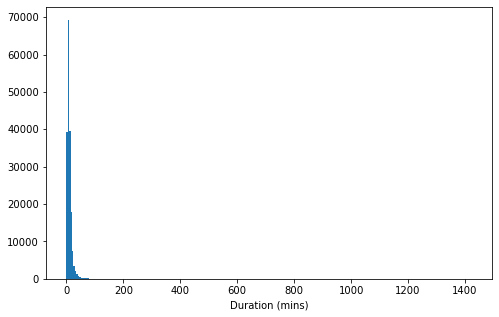

In [35]:
# Create bins for trip duration
bin_size = 5
bins = np.arange(0, df_biketrip_copy['duration'].max() + bin_size, bin_size)

plt.figure(figsize=(8, 5))
plt.hist(df_biketrip_copy['duration'], bins=bins)
plt.xlabel('Duration (mins)');

>Wow, this initial plot show a massive stretch of the data to the far right pointing towards huge outlier values. Let's get a better look at some of this values.

In [36]:
print(df_biketrip_copy.query('duration > 100')['duration'].describe())
df_biketrip_copy.query('duration > 100').head()

count     900.00000
mean      298.62000
std       290.31888
min       101.00000
25%       125.00000
50%       169.00000
75%       321.25000
max      1424.00000
Name: duration, dtype: float64


,duration,timestamp,start_station_id,end_station_id,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip,user_age,distance
0,869,2019-02-28 17:32:10.145,21,13,4902,Customer,1984-01-01,Male,No,35,0.544709
1,708,2019-02-28 18:53:21.789,23,81,2535,Customer,NaT,NaN,No,-1,1.742999
2,1030,2019-02-28 12:13:13.218,86,3,5905,Customer,1972-01-01,Male,No,47,2.704545
3,608,2019-02-28 17:54:26.010,375,7,6638,Subscriber,1989-01-01,Other,No,30,0.260739
199,252,2019-02-28 18:23:19.035,28,368,5380,Subscriber,1980-01-01,Male,No,39,2.776930


In [37]:
# Comparing duration with end_time - start_time from the initial dataframe
#
# First convert start_time and end_time to datatimes
df_biketrip['start_time'] = pd.to_datetime(df_biketrip['start_time'])
df_biketrip['end_time'] = pd.to_datetime(df_biketrip['end_time'])

# Now compare duration_sec with end_time - start_time
(df_biketrip['duration_sec'] != (df_biketrip['end_time'] - df_biketrip['start_time']).dt.seconds).sum()

0

>These values seem to be accurate values to me even after crosschecking with start and end times but they strectch our data too far and away from the bulk of the distribution. They are just **900** data values so I will be dropping this rows.

In [38]:
df_biketrip_copy = df_biketrip_copy.query('duration <= 100')
df_biketrip_copy.shape

(182512, 11)

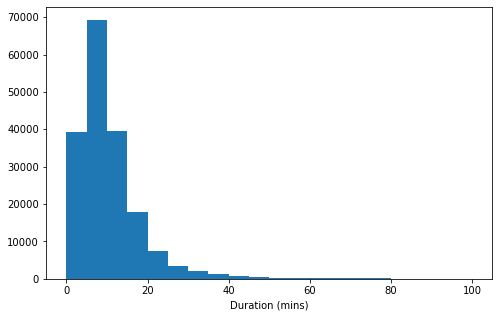

In [39]:
# Now let's have a better look at our distribution
bin_size = 5
bins = np.arange(0, df_biketrip_copy['duration'].max() + bin_size, bin_size)

plt.figure(figsize=(8, 5))
plt.hist(df_biketrip_copy['duration'], bins=bins)
plt.xlabel('Duration (mins)');

>Distribution still really stretched, let's try a log transform of the duration.

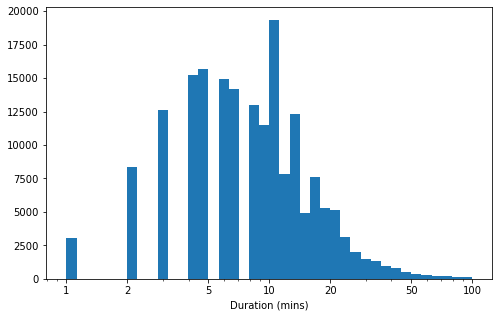

In [40]:
# Log transform distribution of duration of trip
log_binsize = 0.05
log_bins = 10 ** np.arange(0, np.log10(df_biketrip_copy['duration'].max())+log_binsize, log_binsize);

x_ticks = [1, 2, 5, 10, 20, 50, 100]
x_ticklabels = ['{}'.format(x) for x in x_ticks]

plt.figure(figsize=(8, 5))
plt.hist(df_biketrip_copy['duration'], bins=log_bins)
plt.xlabel('Duration (mins)')
plt.xscale('log')
plt.xticks(x_ticks, x_ticklabels);

> Distribution of duration look right-skewed with alot of the data on shorter durations below **40 minutes**. However, when plotted on the log scale, the distribution changed to a bimodal distribution with peak values at around **4 - 5 minutes** mark and **10 minutes**.

### What is the distribution of user type in our dataset?

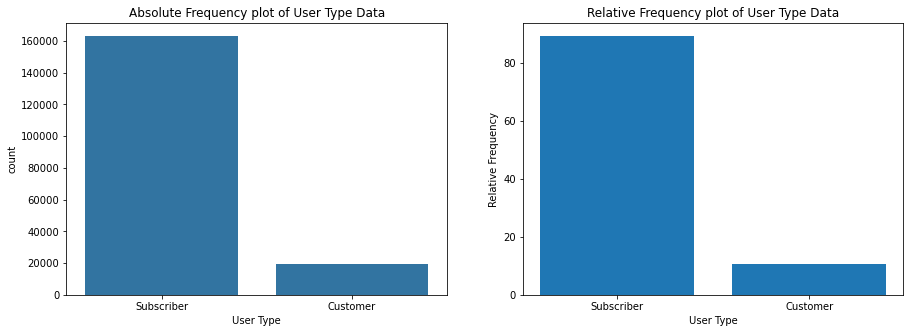

In [41]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(15, 5))

# Absolute frequency plot of user type data
plt.subplot(1, 2, 1)
sb.countplot(data=df_biketrip_copy, x='user_type', color=base_color, order=['Subscriber', 'Customer']);
plt.title('Absolute Frequency plot of User Type Data')
plt.xlabel('User Type');

# Relative frequency plot of user type data
freq_data = 100 * (df_biketrip_copy['user_type'].value_counts()/df_biketrip_copy['user_type'].count())
plt.subplot(1, 2, 2)
plt.bar(freq_data.index, freq_data);
plt.title('Relative Frequency plot of User Type Data')
plt.xlabel('User Type')
plt.ylabel('Relative Frequency');

> Above **80%** of the users are subscribers and below **15%** are not.

### How is distance between start and end stations distributed?

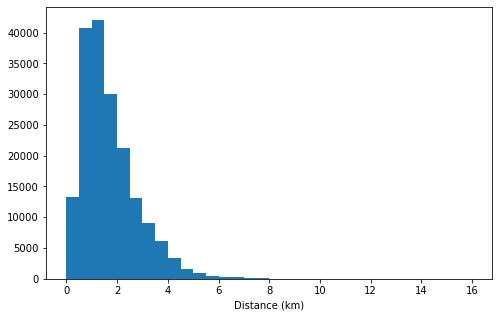

In [42]:
# Create bins for distance
bin_size = 0.5
bins = np.arange(0, df_biketrip_copy['distance'].max() + bin_size, bin_size)

plt.figure(figsize=(8, 5))
plt.hist(df_biketrip_copy['distance'], bins=bins)
plt.xlabel('Distance (km)');

> Another stretched out plot, right-skewed and streched out after **10km**. Let's dive a little deeper.

In [43]:
df_biketrip_copy.query('distance > 10')

,duration,timestamp,start_station_id,end_station_id,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip,user_age,distance
19827,37,2019-02-26 15:11:44.523,227,21,2080,Subscriber,1989-01-01,Male,Yes,30,15.673955
50859,53,2019-02-21 17:51:18.986,167,22,4567,Subscriber,1988-01-01,Other,Yes,31,14.099709
87602,72,2019-02-17 00:27:13.613,9,193,1975,Customer,1993-01-01,Male,No,26,13.590843
89787,30,2019-02-16 14:15:06.336,201,15,6396,Subscriber,1975-01-01,Male,Yes,44,11.531223
121514,29,2019-02-11 14:39:16.299,23,223,855,Subscriber,1988-01-01,Male,No,31,12.409551
153112,36,2019-02-06 13:05:00.691,219,134,3027,Subscriber,1989-01-01,Female,Yes,30,13.894462
161775,39,2019-02-05 13:14:18.246,201,15,4530,Subscriber,1975-01-01,Male,Yes,44,11.531223


> All the distance are on the same range, this values are not a errors but attest to the spread of ford gobike stations. 
>
> One of the rows cleaned when exploring durations had a distance of **69.5km**, viewing the 2 stations linked to the trip start and end locations on google maps shows they are quite far apart and the aproximated travel time on bicycle to be around **49 mins** and from our dataset, users trip duration was around **115 mins(6,945 seconds)**. 
>
> This really shows how well and far **Ford gobike stations** are distributed covering a wide range of area.

In [44]:
print('Start station:\n', df_station.query('id == "21"'), '\n')
print('\nEnd station:\n', df_station.query('id == "3"'), '\n')
print('\nDistance between stations:', get_distance('37.789625,-122.400811,37.317298,-121.884995', 'km'), 'km\n')
df_biketrip.iloc[112038]

Start station:
    id                                              name   latitude   longitude
0  21  Montgomery St BART Station (Market St at 2nd St)  37.789625 -122.400811 


End station:
   id                  name   latitude   longitude
6  3  Palm St at Willow St  37.317298 -121.884995 


Distance between stations: 69.46919870940033 km



duration_sec                                                           6945
start_time                                       2019-02-12 14:28:44.402000
end_time                                         2019-02-12 16:24:30.158000
start_station_id                                                       21.0
start_station_name         Montgomery St BART Station (Market St at 2nd St)
start_station_latitude                                            37.789625
start_station_longitude                                         -122.400811
end_station_id                                                        300.0
end_station_name                                       Palm St at Willow St
end_station_latitude                                              37.317298
end_station_longitude                                           -121.884995
bike_id                                                                4780
user_type                                                        Subscriber
member_birth

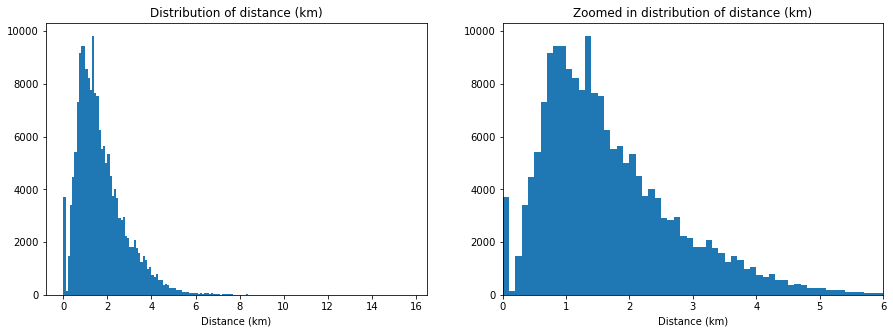

In [45]:
# Create bins for distance
bin_size = 0.1
bins = np.arange(0, df_biketrip_copy['distance'].max() + bin_size, bin_size)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df_biketrip_copy['distance'], bins=bins)
plt.xlabel('Distance (km)');
plt.title('Distribution of distance (km)')

# Let's zoom in a little more into the distribution
plt.subplot(1, 2, 2)
plt.hist(df_biketrip_copy['distance'], bins=bins)
plt.xlabel('Distance (km)')
plt.xlim(0, 6);
plt.title('Zoomed in distribution of distance (km)');

> We we sure do have **0 distance**, this will be the case when a person picks a bike at a start station and returns it back to the station where they picked the bike. We can also notice the distribution is rigth skewed with it's peak at around **1 - 1.5 km**. 
>
> This generally tells us that most user return bikes to stations in close proximity to where they picked up the bikes.

### How is users age distributed in the dataset?

In [46]:
# Remember we set NaN to be "-1" because there is no NaN representation in integer, 
# so we will build the plot with values greater then -1.
df_interest = df_biketrip_copy.query('user_age > -1')
df_interest.shape

(174449, 11)

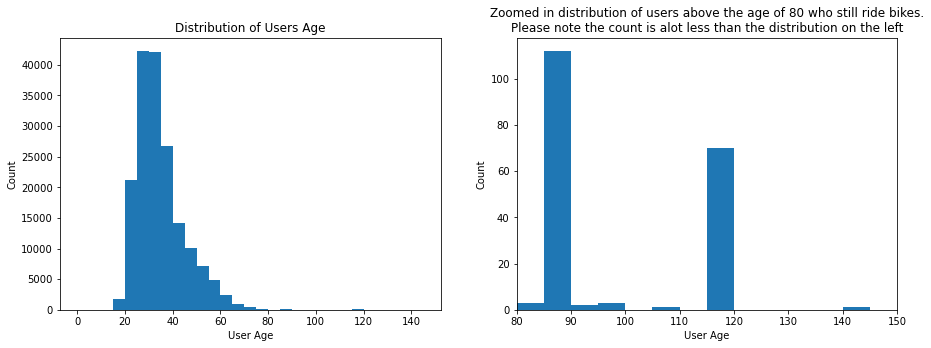

In [47]:
bin_size = 5
bins = np.arange(0, df_interest['user_age'].max()+bin_size, bin_size)

plt.figure(figsize=(15, 5))

# Distribution of users age
plt.subplot(1, 2, 1)
plt.hist(df_interest['user_age'], bins=bins)
plt.xlabel('User Age');
plt.ylabel('Count')
plt.title('Distribution of Users Age')

# Distribution of users above the age of 80 who still ride bikes
plt.subplot(1, 2, 2)
plt.hist(df_interest.query('user_age > 80')['user_age'], bins=bins)
plt.xlabel('User Age')
plt.xlim([80, 150])
plt.ylabel('Count')
plt.title('Zoomed in distribution of users above the age of 80 who still ride bikes.\nPlease note the count is alot less than the distribution on the left');

In [48]:
df_interest.query('user_age > 140')

,duration,timestamp,start_station_id,end_station_id,bike_id,user_type,user_birth_year,user_gender,bike_share_for_all_trip,user_age,distance
27370,24,2019-02-25 09:28:42.161,15,386,6436,Customer,1878-01-01,Female,No,141,5.310289


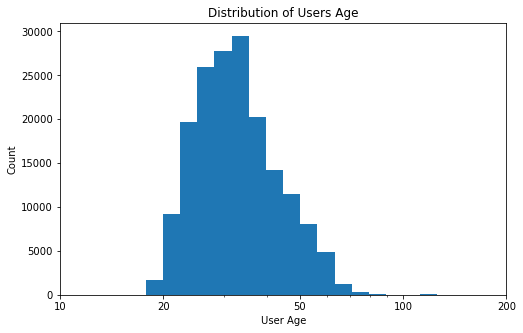

In [49]:
# Ploting on a log scale
bin_size = 0.05
log_bins = 10 ** np.arange(1.2, np.log10(df_interest['user_age'].max())+bin_size, bin_size)

x_ticks = [10, 20, 50, 100, 200]
x_ticklabels = ['{}'.format(x) for x in x_ticks]

plt.figure(figsize=(8, 5))
plt.hist(df_interest['user_age'], bins=log_bins)
plt.xlabel('User Age');
plt.ylabel('Count')
plt.xscale('log')
plt.xticks(x_ticks, x_ticklabels)
plt.title('Distribution of Users Age');

> Turns out we have a couple of old guys still in the game. We have people above **80 years** and **120 years** who still ride bicycles, we even have a person above **140 years** that still ride bikes.\
> We notice 2 peaks for user above 80 year; 1st peak are users within the range of **85 - 90 years** and the 2nd peak are users within the age range of **115 - 120 years**. 
>
> I don't know how valid this data are really (I mean this guys are really old) and I don't have any way to prove an alternative (that the data is not valid) so we fail to diagree with data.
>
> Generally the distribution mostly right-skewed with the age range of **25 - 35 years** being the most that ride bikes. Ploting this on a log scale shows an almost normal distribution centering around **25 - 35 years** and slides down on both end. We also notice that no user below **18 years** is in the system, this is based on companies policy.

### How is the timestamp variable distributed in the dataset?
This is a dataset for just one month of the year 2019 so we will be investigating just the time of day and the day of week.
So we will engineer 2 new features here;
* Hour of day
* Day of week.

In [50]:
# Creating the two new variables
df_biketrip_copy['time_of_day'] = df_biketrip_copy['timestamp'].dt.hour
df_biketrip_copy['day_of_week'] = df_biketrip_copy['timestamp'].dt.dayofweek

In [51]:
# Set the order for time_of_day
tod_order = np.arange(0, 24, 1)
tod_order = pd.api.types.CategoricalDtype(categories=tod_order, ordered=True)
df_biketrip_copy['time_of_day'] = df_biketrip_copy['time_of_day'].astype(tod_order)

# Set the order for day_of_week
dow_order = np.arange(0, 7, 1)
dow_order = pd.api.types.CategoricalDtype(categories=dow_order, ordered=True)
df_biketrip_copy['day_of_week'] = df_biketrip_copy['day_of_week'].astype(dow_order)

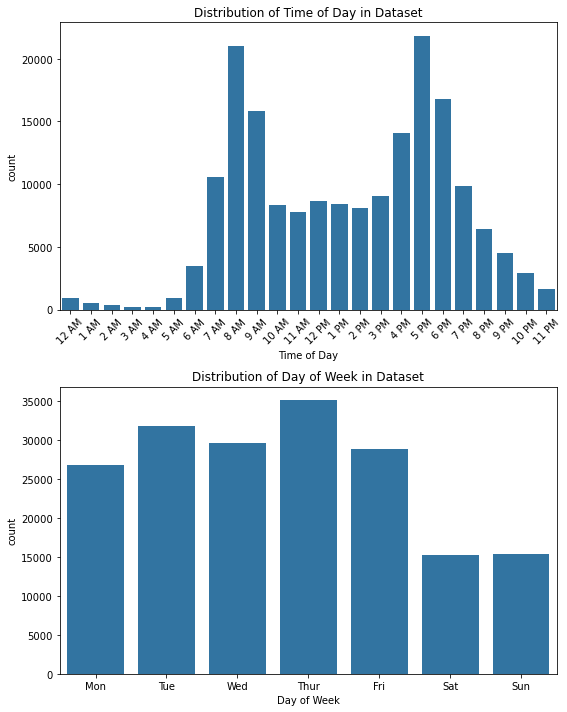

In [52]:
# Now we plot the distribution of new time features
plt.figure(figsize=(8, 10), tight_layout=True)

# Create tick labels for time of day
tod_labels = []
for time in tod_order.categories:
    if time == 0:
        tod_labels.append('12 AM')
    elif time < 12:
        tod_labels.append('{} AM'.format(time))
    elif time == 12:
        tod_labels.append('12 PM')
    else:
        tod_labels.append('{} PM'.format(time - 12))

# Plot time of day distribution
plt.subplot(2, 1, 1)
sb.countplot(data=df_biketrip_copy, x='time_of_day', color=base_color)
plt.xticks(tod_order.categories, tod_labels, rotation=45);
plt.xlabel('Time of Day')
plt.title('Distribution of Time of Day in Dataset');


# Create tick labels for day of week
dow_labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
# Plot day of week distribution
plt.subplot(2, 1, 2)
sb.countplot(data=df_biketrip_copy, x='day_of_week', color=base_color)
plt.xticks(dow_order.categories, dow_labels);
plt.xlabel('Day of Week')
plt.title('Distribution of Day of Week in Dataset');

> We can see a couple of interesting insights already;
> * The distribution of ***tour_of_day*** is bimodal showing peaks around **8 AM** and **5 PM** which is around when people go to work and when people return from work respectively. It shows very little activities in the early hours of the morning when people are at sleep and shows roughly the same level of activity from **10 AM** to **3 PM** when people would mostly be at their work places.
> * The distribution of ***day_of_week*** shows more activities in week days than week ends which **Thurdays** being the peak day of activity. Week ends shows almost same level of activity for each of the day.

### How are other categorical variables distributed in the dataset?

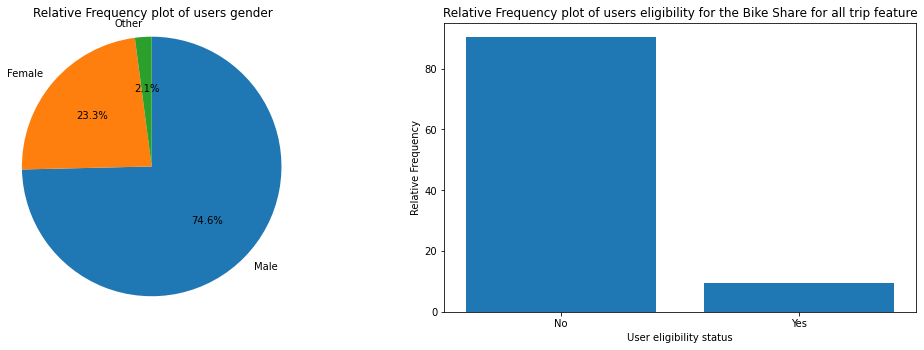

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=2.5)

plt.sca(ax[0])
freq_data = 100 * (df_biketrip_copy['user_gender'].value_counts()/df_biketrip_copy['user_gender'].count())
plt.pie(freq_data, labels=freq_data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square');
plt.title('Relative Frequency plot of users gender')

# Relative Frequency plot of users eligibility for the Bike Share for all trip feature
plt.sca(ax[1])
freq_data = 100 * (df_biketrip_copy['bike_share_for_all_trip'].value_counts()/df_biketrip_copy['bike_share_for_all_trip'].count())
plt.bar(freq_data.index, freq_data);
plt.title('Relative Frequency plot of users eligibility for the Bike Share for all trip feature')
plt.xlabel('User eligibility status')
plt.ylabel('Relative Frequency');

> There are more male present in the dataset with about **74.6%** of users being male and just about **23.3%** being female. Only **2.1%** have non-binary genders.
>
> Above **80%** of user are **not** eligible for the `bike_share_for_all_trip` feature.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Distribution of duration look right-skewed with alot of the data on shorter durations below **40 minutes**. However, when plotted on the log scale, the distribution changed to a slight bimodal distribution peaking at around **4 - 5 minutes** mark and around **10 minutes**.

I noticed some really large outliers in the data with durations above **100 minutes**. This values weren't invalid data because they matched when compared with `start_time` and `end_time`. I dropped them though because they pulled our data far to the right as far as **1400 minutes** when our data is mainly distributed below **100 minutes**.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

On the `distance` feature I engineered, I noticed a couple of outliers present stretching our distance distribution far right as far as **16 km** (We even have a distance of **69.5 km**, that was cleaned earlier, shown in the univariate exploration section of distance). This values aren't invalid data, they only show how far spread the coverage of Ford GoBike stations are, so I didn't perform any cleaning operations on them.\
I also noticed some **0 km** distances in the dataset which showed that some user return the bikes to the stations where they picked it from. Infact, generally, most user will return the bike to stations in close proximity to where they picked it from.

I also engineered the `user_age` feature which had some very interesting insight that showed really old people, as old as **141 years** who still ride bikes, infact there are more than **150 people** older than **80 years** who still ride bikes. I didn't perform any cleaning here, I just zoomed in on portions of the data. 
I also ploted the data on a log scale which showed a normal distribution from a right-skewed distribution with no user below **18 years** and having it's peak values at age range **25-35 years**.

I also engineered 2 more feataures, `time_of_day` and `day_of_week` which proved to be very insightful showing most acitvities around **8 AM** when most users are leaving for work and **5 PM** when most users are returning from work.\
The `day_of_week` feature showed more activities on week days then on week ends with **Thurdays** as the peak of activities.

Other features were really insighful;
* `user_type` feature showed more then **80%** of user being subscribed while less then **20%** not.
* `user_gender` showed a form of gender bias in favour of the male gender with **74.6%** of users being males and only **23.3%** being females, while just **2.1%** are non-binary.
* Not so many users are eligible for the `bike_share_for_all_trip` feature, just about **10%** are.

## Bivariate Exploration

In [54]:
 def log_transform(x, inverse=False):
    '''Function that computes the transform and inverse transform of a variable'''
    
    # Make sure x is not NaN or "-1"
    if x == x and x != -1:
        return 10 ** x if inverse else np.log10(x)
    
    return x

In [55]:
# Numeric variable in the data
numeric_vars = ['duration', 'user_age', 'distance']

# Norminal categorical variables in the data
norminal_vars = ['user_type', 'user_gender', 'bike_share_for_all_trip']

# Ordinal categorical variables in the data
ordinal_vars = ['time_of_day', 'day_of_week']

In [56]:
# Log transform of duration
df_biketrip_copy['log_duration'] = df_biketrip_copy['duration'].apply(log_transform)

# Log tranform of user_age
df_biketrip_copy['log_user_age'] = df_biketrip_copy['user_age'].apply(log_transform)

In [57]:
# Dataframe with trimmed user age data
# Remember aga NaN is stored as -1
df_trimmed_age = df_biketrip_copy.query('user_age > -1')

### Relationship between the 3 numeric variables

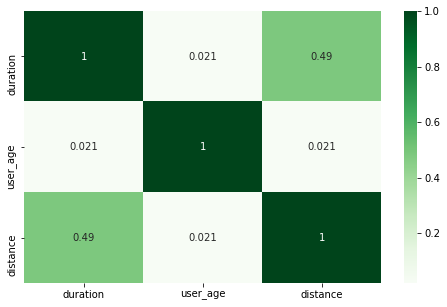

In [58]:
# Plot a heatmap of pairs of numeric variables
plt.figure(figsize=(8,5))
sb.heatmap(df_trimmed_age[numeric_vars].corr(), annot=True, cmap='Greens');

> `user_age` has the same correlation coefficient with `duration` and `distance` which shows no linear correlation between the variables. However, there exist a slight positive linear relationship between `duration` and `distance`.
>
> Let's visualize these pairs much better in a scatter plot.

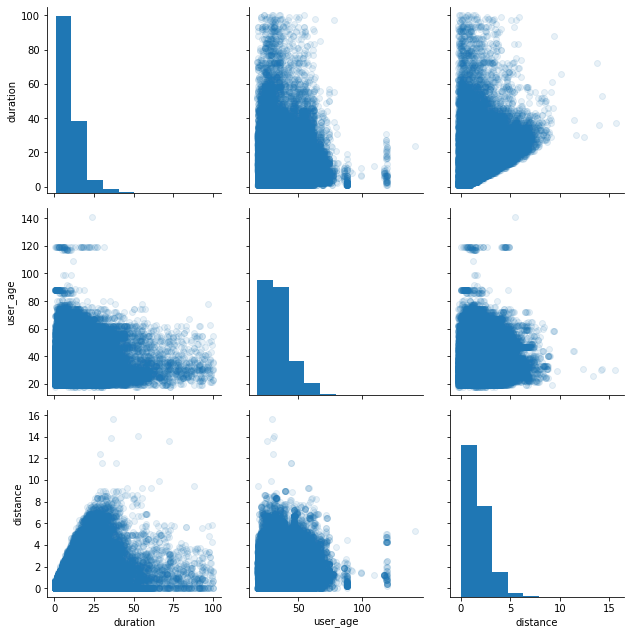

In [59]:
# Will be using the seaborn.PairGrid() function to create this plot
grid = sb.PairGrid(data=df_trimmed_age, vars=numeric_vars, height=3)
grid.map_diag(plt.hist)
grid.map_offdiag(sb.regplot, scatter_kws={"alpha":0.1}, x_jitter=0.3, fit_reg=False);

> We can see the no correlation between the `user_age` and `duration` or `distance` variables.
>
> However, we can see an interesting relationship between `duration` and `distance`, as the distance between the start and end stations increases, the minimum trip duration increase. So basically you can take as much time as you want with a bike, but as long as the distance of the station where a user drops off bike increases, there is a minimum duration a user must spend on the bike before drop off, you can't go below that duration for each increase in distance.

### Relationships in norminal variables.

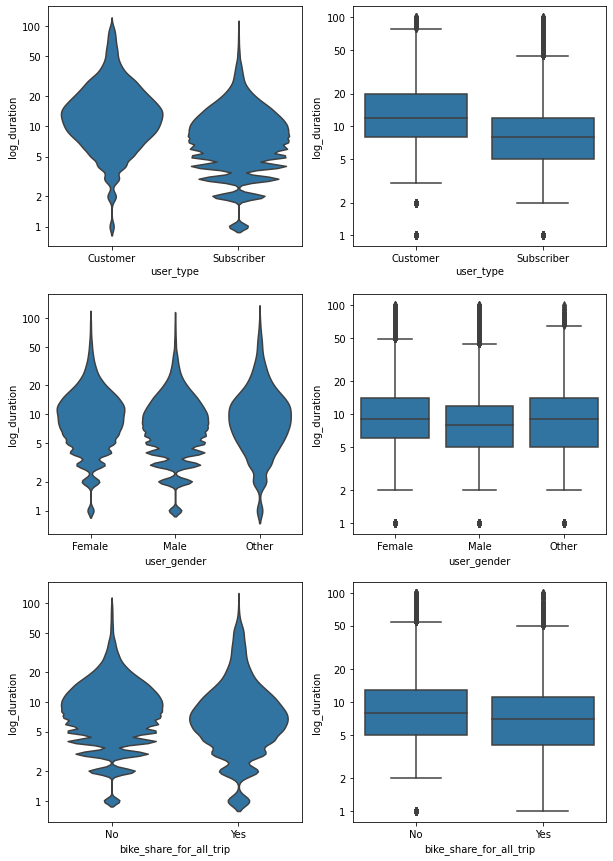

In [60]:
# First we start with the ralationship between the norminal variables and duration
# ['user_type', 'user_gender', 'bike_share_for_all_trip']
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

y_ticks = [1, 2, 5, 10, 20, 50, 100]
y_ticklabels = ['{}'.format(y) for y in y_ticks]
y_log_ticks = [log_transform(y) for y in y_ticks]

for row_index, variable in enumerate(norminal_vars):
    # violinplot on the left
    plt.sca(ax[row_index][0])
    sb.violinplot(x=df_biketrip_copy[variable], y=df_biketrip_copy['log_duration'], color=base_color, inner=None);
    plt.yticks(y_log_ticks, y_ticklabels)

    # boxplot on the right
    plt.sca(ax[row_index][1])
    sb.boxplot(x=df_biketrip_copy[variable], y=df_biketrip_copy['log_duration'], color=base_color);
    plt.yticks(y_log_ticks, y_ticklabels)

> We can notice the same kind of distribution with the histrogram plot of the log of duration in the violin plot.\
> However, some more interesting insight, turns out non subscribed customers spend more time with there bikes than subscribed customers (we can see this more clearly in the box plots).
>
> Male users tend to spend less time with their bikes than female and other non-binary users.
>
> Users who are not eligible for the bike_share_for_all_trip features spend more time with bikes than those who are.
>
> Let's see how the 3 variables relate with age.

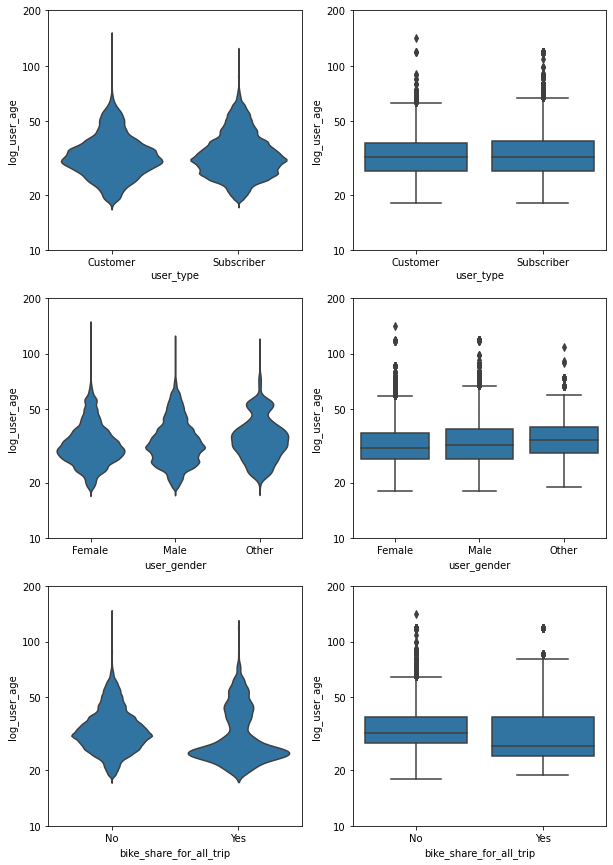

In [61]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

y_ticks = [10, 20, 50, 100, 200]
y_ticklabels = ['{}'.format(y) for y in y_ticks]
y_log_ticks = [log_transform(y) for y in y_ticks]

for row_index, variable in enumerate(norminal_vars):
    # violinplot on the left
    plt.sca(ax[row_index][0])
    sb.violinplot(x=df_trimmed_age[variable], y=df_trimmed_age['log_user_age'], color=base_color, inner=None);
    plt.yticks(y_log_ticks, y_ticklabels)

    # boxplot on the right
    plt.sca(ax[row_index][1])
    sb.boxplot(x=df_trimmed_age[variable], y=df_trimmed_age['log_user_age'], color=base_color);
    plt.yticks(y_log_ticks, y_ticklabels)

> We notice the same that the distribution of age is about the same for both subscribed users and non subscribed users.\
> The same goes for gender, there is a similar distribution of age in both male and the female gender. The non binary genders are a little high in age then the binary genders.\
> Users who are eligible for the "bike share for all trip" feature are on the younger spectrum than users who don't qualify.
>
> Let's have a look at the 3 norminal variables together.

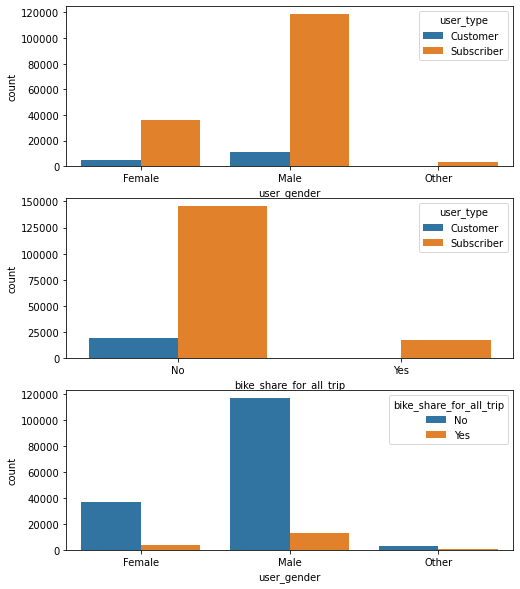

In [62]:
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
sb.countplot(data=df_biketrip_copy, x='user_gender', hue='user_type')

plt.subplot(3, 1, 2)
sb.countplot(data=df_biketrip_copy, x='bike_share_for_all_trip', hue='user_type')

plt.subplot(3, 1, 3)
sb.countplot(data=df_biketrip_copy, x='user_gender', hue='bike_share_for_all_trip');

> In the 3 cases, the trend is about consistent with when each was plotted univariately.\
> The number of subscribed users are always more irrespective of gender or user eligibility to the bike_share_for_all_trip feature, and vise versa.
>
> There is no case of "Simpson's paradox" in the data.

### Relationships in ordinal variables

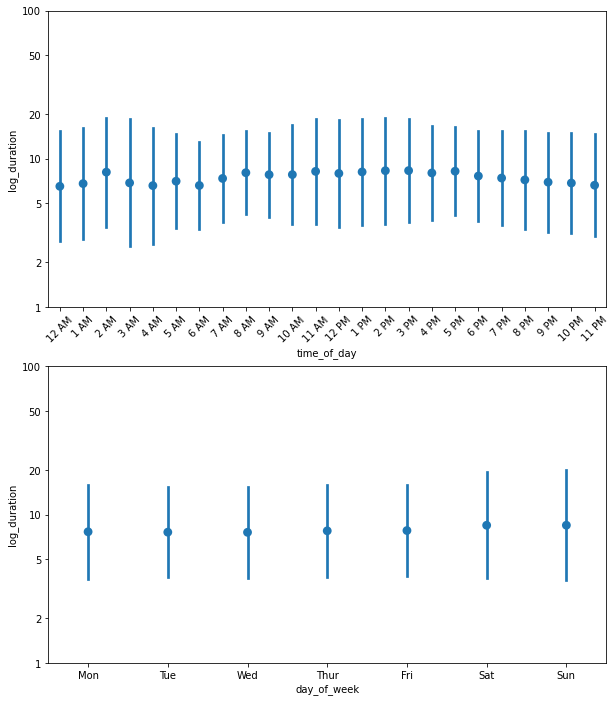

In [63]:
# Let's see the relationships between the ordinal variables and duration
#
# Remember labels for time of day ["tod_labels"] and day of week ["dow_labels"] have been created initially

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

y_ticks = [1, 2, 5, 10, 20, 50, 100]
y_ticklabels = ['{}'.format(y) for y in y_ticks]
y_log_ticks = [log_transform(y) for y in y_ticks]

for row_index, variable in enumerate(ordinal_vars):
    # Get category and label info
    if row_index == 0:
        x_cat = tod_order.categories # Categories of time of day
        x_labels = tod_labels
    else:
        x_cat = dow_order.categories # Categories of day of week
        x_labels = dow_labels
    
    plt.sca(ax[row_index])
    sb.pointplot(data=df_biketrip_copy, x=variable, y='log_duration', color=base_color, ci='sd', linestyles="");
    plt.xticks(x_cat,  x_labels)
    plt.yticks(y_log_ticks, y_ticklabels)
    if row_index == 0: plt.xticks(rotation=45)

> Hmmm... Not soo much going on here. Although we can notice increase trip duration by 2 AM followed by a decrease at 4 AM, in the time of day plot.\
> Generally, the plot follows some sort of sine wave kind of flow.
>
> There is a light increase in trip duration for week ends than for week days, this could be that most users are free and aren't going to work and so they tend to take their time.
>
> Let's view time relationship with user age.

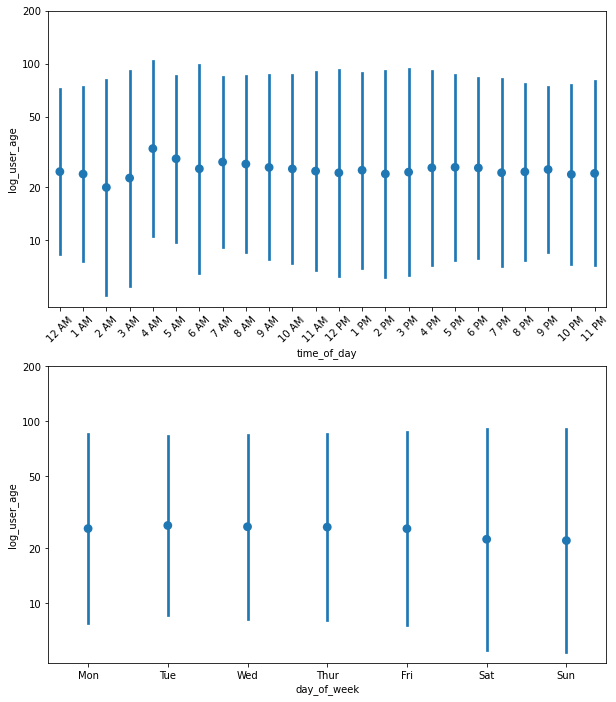

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

y_ticks = [10, 20, 50, 100, 200]
y_ticklabels = ['{}'.format(y) for y in y_ticks]
y_log_ticks = [log_transform(y) for y in y_ticks]

for row_index, variable in enumerate(ordinal_vars):
    # Get category and label info
    if row_index == 0:
        x_cat = tod_order.categories
        x_labels = tod_labels
    else:
        x_cat = dow_order.categories
        x_labels = dow_labels
    
    plt.sca(ax[row_index])
    sb.pointplot(data=df_biketrip_copy, x=variable, y='log_user_age', color=base_color, ci='sd', linestyles="");
    plt.xticks(x_cat,  x_labels)
    plt.yticks(y_log_ticks, y_ticklabels)
    if row_index == 0: plt.xticks(rotation=45)

> We can can notice a slight peak in age around 4 AM, in the time of day plot, with sharp decline on both sides.\
> This could be a time when most older people come out to get some workout.
>
> The day of week plot shows a slight decline in age for weekends as compared to week days.
>
> Let's look at the relationship of these variables together.

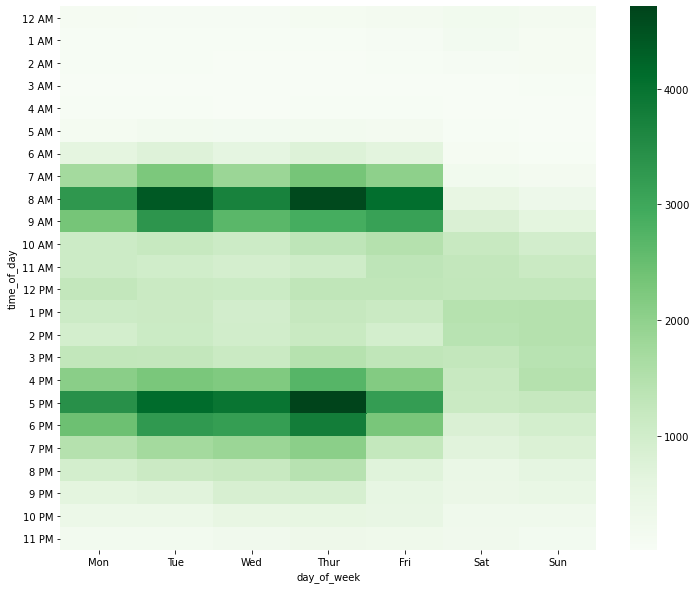

In [65]:
data_matrix = df_biketrip_copy.groupby(ordinal_vars).size().reset_index(name='count')

data_matrix = data_matrix.pivot(index='time_of_day', columns='day_of_week', values='count')

plt.figure(figsize=(12, 10))
sb.heatmap(data_matrix, cmap='Greens')
plt.xticks(dow_order.categories + 0.5, dow_labels)
plt.yticks(tod_order.categories + 0.5, tod_labels, rotation=0);

> We observe how effective and important the **Ford GoBike** program is to the working class population. We can see those peaks we observed in the univariate plot case of time of day show up here, around **8 AM** and **5 PM**, on weekdays and quickly disappears on weekends. Weekends even have more activities from **10 AM** to **3 PM** than the time periods for our peaks on weekdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There exist some slight linear relationship between trip duration and distance from start and end stations. For a particular distance from start and end station, there is a lower bound of trip duration.
>
> Also it turns out I was wrong about subscribed customers spending more time per trip. The data showed that non-subscribed customers spend more time per trip than subscribed customers.
>
> I also observed that the male gender spends less time per trip than the female of the non-binary gender.
>
> When comparing the relationship of duration with the time variables, I noticed a little peak at 2 AM show that most people who use the program at that time tends to spend more time with the bike than those who use the progran at other times, not sure why.\
> On the day of week plot, though, there is a light increase in trip duration for week ends than for week days, this could be that most users are free and aren't going to work and so they tend to take their time.
>
> There isn't so much going on with trip duration and other variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed a peak in user_age around 4 AM which might mean that older users tend to user the bike program in the early hours of the morning probably for workout.
>
> I also observed some increase in activity in the program on weekdays at around 8 AM and 5 PM which are times when people go to work and leave from work. This would suggest how useful the program is for working class people and would also suggest that the working class age range are the most users of the program.\
> This also tallies with the findings in the univariate exploration.

## Multivariate Exploration

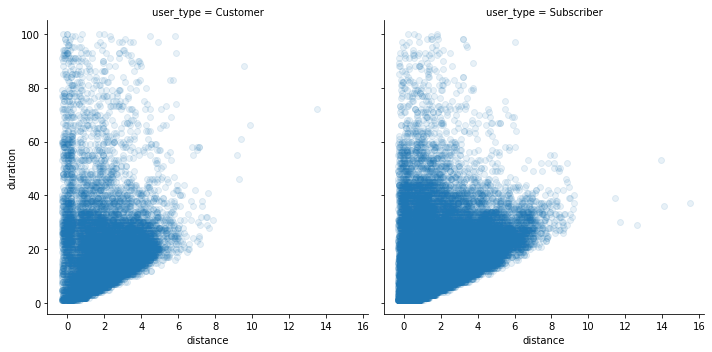

In [66]:
# Let's view the combined relatinship between duration, distance and user type
g = sb.FacetGrid(data=df_biketrip_copy, col='user_type', height=5)
g.map(sb.regplot, 'distance', 'duration',scatter_kws={"alpha":0.1}, x_jitter=0.3, fit_reg=False);

> Well the plot shows that for subscribed customers, the start and end station distances are a little more larger than the unsubscribed customers. But generally the plot look quite similar and much alike with what we observed in the bivariate exploration phase.
>
> Let's visualize the distribution of duration, distance and gender.

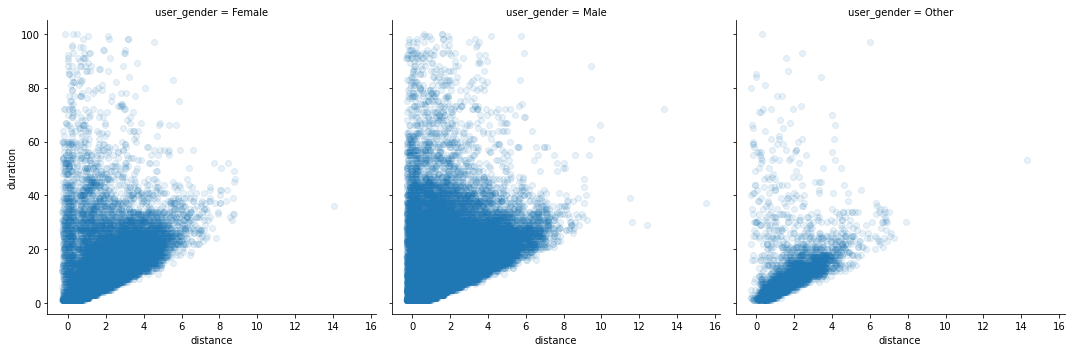

In [67]:
# duration distance and gender
g = sb.FacetGrid(data=df_biketrip_copy, col='user_gender', height=5)
g.map(sb.regplot, 'distance', 'duration',scatter_kws={"alpha":0.1}, x_jitter=0.3, fit_reg=False);

> We have a new sets of plots that look quite similar to what we observed before.
>
> Let's get some look into the visualization of time variables and duration.

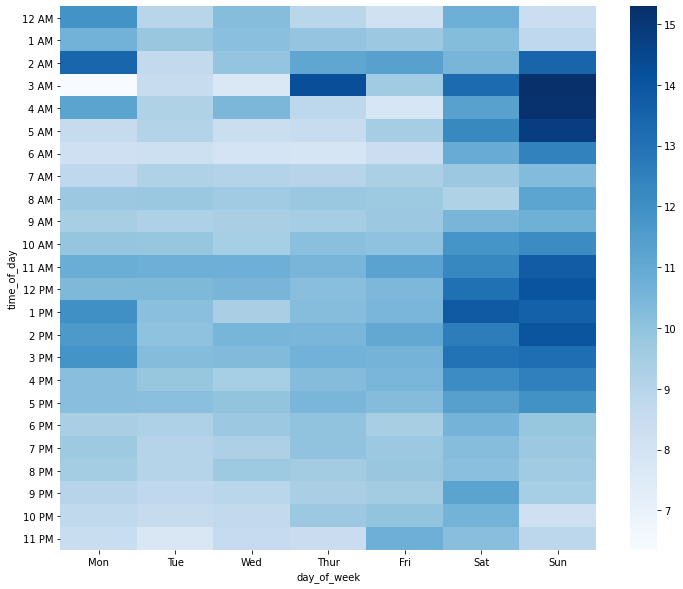

In [68]:
# We will plot this visualization in a heatmap
#
# To do so, we create matrix kind of dataset for our seaborn heatmap function
data_matrix = df_biketrip_copy.groupby(ordinal_vars)['duration'].mean().reset_index(name='avg_duration')

# Pivot datatframe to have accurate mapping of variables.
data_matrix = data_matrix.pivot(index='time_of_day', columns='day_of_week', values='avg_duration')

plt.figure(figsize=(12, 10))
sb.heatmap(data_matrix, cmap='Blues')
plt.xticks(dow_order.categories + 0.5, dow_labels)
plt.yticks(tod_order.categories + 0.5, tod_labels, rotation=0);

> It can be noticed that users tend to spend more time on average per trip on weekends than on weekdays, maybe because they don't have to rush to get to work and so they take there time.
>
> We can notice this weekend activities split into two sections, 3-5 AM (People working out and so they take longer time on per trip knowing they don't have to go to work for the day), and 10 AM -  5PM (People just crusing on the bike).
>
> This also highlights the fact that when people are in a haste to get to work, the don't spend too much time on trip which is why we can observe the short durations at 8AM and 5 PM on weekdays when most people go to work.
>
> We can also see that peak at 2 AM observed in the bivariate case and it exist on Mondays, Thursday, Fridays and on Sunday. Still not sure why.
>
> Let's get some look into the visualization of time variables and age.

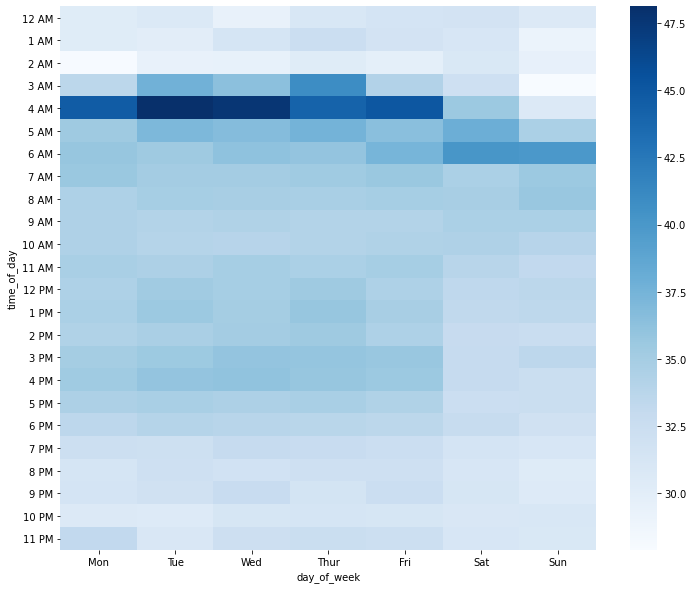

In [69]:
# We will also plot this visualization in a heatmap
#
# To do so, we create matrix kind of dataset for our seaborn heatmap function
data_matrix = df_trimmed_age.groupby(ordinal_vars)['user_age'].mean().reset_index(name='avg_age')

# Pivot datatframe to have accurate mapping of variables.
data_matrix = data_matrix.pivot(index='time_of_day', columns='day_of_week', values='avg_age')

plt.figure(figsize=(12, 10))
sb.heatmap(data_matrix, cmap='Blues')
plt.xticks(dow_order.categories + 0.5, dow_labels)
plt.yticks(tod_order.categories + 0.5, tod_labels, rotation=0);

> Here we see that peak at 4 AM that we observed for older people, interestingly this peak appears more stadily for weekdays and drifts abit to somewhere around 5 - 6 AM for weekends.\
> I would say that during work days most older people above 40 years, tend to work out (and most use the gobike program for this) early so they can have some time to prepare for work and on week ends their work out routines drift a little towards 6 AM since they don't have to go to work.
>
> If you also look a little more closely, you will notice the age range of 30 - 37 years being more active on weekdays than on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between duration, distance, user_type and user_age remained about the same with that observed in the bivariate case.
>
> However, the relationship between duration and the time variables shows some more interesting insights;\
> It can be noticed that users tend to spend more time on average per trip on weekends than on weekdays, maybe because they don't have to rush to get to work and so they take there time.
>
> We can notice this weekend activities split into two sections, 3-5 AM (People working out and so they take longer time on per trip knowing they don't have to go to work for the day), and 10 AM -  5PM (People just crusing on the bike).
>
> This also highlights the fact that when people are in a haste to get to work, the don't spend too much time on trip which is why we can observe the short durations at 8AM and 5 PM on weekdays when most people go to work.

### Were there any interesting or surprising interactions between features?

> Not so much as a surprise as we've seen that in the bivariate exploration phase, in the visualization of the time variables and age, we see the peak we noticed previouly, the peak at 4 AM that we observed for older people, interestingly this peak appears more stadily for weekdays and drifts abit to somewhere around 5 - 6 AM for weekends.

## Conclusions
> Started of the exploration be cleaning up the data for easy use and engineered some features in the process. I then explored the dataset going from univariate, where I explored individual variables, to bivariate, where I explored pairs of variables to multivariate, where I observed multiple variables at onces.
>
> In the exploration, I found some really interesting insights;
> * There are some really old user, older than 120 years of age, who still take bike trips.
> * Ford GoBike have some really spread out stations covering more than 60kms in the bay area.
> * Users generally spend 5-10 mins on avegare per trip.
> * Unsubscribed users spend more time per trip than subscribed users.
> * The gobike program is highly useful for working class people as a means for commute to work.
> * I also observed that most users use the program to get some workouts.
> * And users on average spend more time per trip on weekends than on weekdays.

